#**Molecular Descriptors**


#**1. Prepare the environment**

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 20.5 MB/s eta 0:00:00


In [ ]:
!pip install pandas rdkit datamol tqdm mols2grid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.4/495.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.9 MB/s eta 0:00:00


In [ ]:
import datamol as dm
from tqdm.auto import tqdm
from rdkit.Chem import rdDepictor
import mols2grid
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True)

#**2. Load Database**

In [ ]:
df = pd.read_csv("/content/7_viralcompound_focusedOnResp_complete_VERSION_2.csv")
df.head(2)

,Unnamed: 0,molecule_chembl_id,acronym,target,activity_id,assay_chembl_id,assay_description,document_chembl_id,document_journal,ligand_efficiency,...,Overall_Classification,Classification_length,Inhibitor,No_Activity,Unknown,Total,%_Inhibitor,%_No_Activity,%_Unknown,Final_Classification
0,0,CHEMBL222813,IAV,Neuraminidase,3527776 - 6383033 - 3341420 - 13932871 - 13932...,CHEMBL1274484 - CHEMBL1839500 - CHEMBL1167423 ...,Inhibition of Influenza A virus (A/duck/Laos/2...,CHEMBL1134303 - CHEMBL4425127 - CHEMBL3817747 ...,Bioorg Med Chem Lett - Eur J Med Chem - Medche...,"{'bei': '29.48', 'le': '0.58', 'lle': '13.38',...",...,Mixed,2357,179,2,0,181,98.90,1.10,0.00,Inhibitor
1,1,CHEMBL1229,IAV,Neuraminidase,2947997 - 2947996 - 8059690 - 2948009 - 139446...,CHEMBL1041520 - CHEMBL1041523 - CHEMBL1958757 ...,Inhibition of Influenza A virus (A/duck/Laos/2...,CHEMBL4130469 - CHEMBL1134303 - CHEMBL3739372 ...,Bioorg Med Chem Lett - J Nat Prod - Eur J Med ...,"{'bei': '31.36', 'le': '0.61', 'lle': '8.51', ...",...,Mixed,1434,100,6,4,110,90.91,5.45,3.64,Inhibitor


In [ ]:
#Select columns
df = df[["molecule_chembl_id", "main_organism", "acronym", "target", "Canonical_SMILES_STD", 'Final_Classification']]
df.head(4)

,molecule_chembl_id,main_organism,acronym,target,Canonical_SMILES_STD,Final_Classification
0,CHEMBL222813,influenza a virus,IAV,Neuraminidase,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,Inhibitor
1,CHEMBL1229,influenza a virus,IAV,Neuraminidase,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,Inhibitor
2,CHEMBL674,influenza a virus,IAV,Neuraminidase,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](N)[C@H]1NC(C)=O,Inhibitor
3,CHEMBL466246,influenza a virus,IAV,Neuraminidase,CO[C@@H]([C@@H]1OC(C(=O)O)=C[C@H](NC(=N)N)[C@H...,Inhibitor


In [ ]:
# drug type descriptor computing
descriptors_df = pd.DataFrame()
descriptors_df["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in df["Canonical_SMILES_STD"])]
descriptors_df["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in df["Canonical_SMILES_STD"])]
descriptors_df["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in df["Canonical_SMILES_STD"])]
descriptors_df["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in df["Canonical_SMILES_STD"])]
descriptors_df["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in df["Canonical_SMILES_STD"])]
descriptors_df["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in df["Canonical_SMILES_STD"])]
descriptors_df["CSP3"] = [Descriptors.NumSaturatedRings(y) for y in (Chem.MolFromSmiles(x) for x in df["Canonical_SMILES_STD"])]
descriptors_df["HEAVY"] = [Descriptors.HeavyAtomCount(y) for y in (Chem.MolFromSmiles(x) for x in df['Canonical_SMILES_STD'])]
descriptors_df["RING"] = [Descriptors.RingCount(y) for y in (Chem.MolFromSmiles(x) for x in df['Canonical_SMILES_STD'])]
descriptors_df["HETATOMS"] = [Descriptors.NumHeteroatoms(y) for y in (Chem.MolFromSmiles(x) for x in df['Canonical_SMILES_STD'])]
descriptors_df["CARBOALICYCLIC"] = [Descriptors.NumAliphaticCarbocycles(y) for y in (Chem.MolFromSmiles(x) for x in df['Canonical_SMILES_STD'])]
descriptors_df["HETEROALICYCLIC"] = [Descriptors.NumAliphaticHeterocycles(y) for y in (Chem.MolFromSmiles(x) for x in df['Canonical_SMILES_STD'])]
descriptors_df["CARBOAROMATIC"] = [Descriptors.NumAromaticCarbocycles(y) for y in (Chem.MolFromSmiles(x) for x in df['Canonical_SMILES_STD'])]
descriptors_df["HETEROAROMATIC"] = [Descriptors.NumAromaticHeterocycles(y) for y in (Chem.MolFromSmiles(x) for x in df['Canonical_SMILES_STD'])]
descriptors_df["AROMATIC"] = [Descriptors.NumAromaticRings(y) for y in (Chem.MolFromSmiles(x) for x in df['Canonical_SMILES_STD'])]
descriptors_df

,HBA,HBD,RB,LogP,TPSA,MW,CSP3,HEAVY,RING,HETATOMS,CARBOALICYCLIC,HETEROALICYCLIC,CARBOAROMATIC,HETEROAROMATIC,AROMATIC
0,7,8,6,-3.57583,198.22,332.313,0,23,1,11,0,1,0,0,0
1,5,2,7,1.28540,90.65,312.410,0,22,1,6,1,0,0,0,0
2,4,3,6,0.80690,101.65,284.356,0,20,1,6,1,0,0,0,0
3,7,7,7,-2.92173,187.22,346.340,0,24,1,11,0,1,0,0,0
4,8,6,14,-0.01033,193.29,472.539,0,33,1,12,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,6,1,7,2.76470,107.77,324.333,0,23,1,8,0,0,1,0,1
4517,4,5,5,1.43577,137.53,294.311,0,21,1,8,0,0,1,0,1
4518,9,0,4,3.19960,111.46,494.507,0,37,6,9,2,1,2,1,3
4519,4,1,4,2.75300,64.63,277.320,1,20,2,5,1,0,1,0,1


In [ ]:
# Concat
df_descriptors = pd.concat([df, descriptors_df], axis=1)
df_descriptors.head(5)

,molecule_chembl_id,main_organism,acronym,target,Canonical_SMILES_STD,Final_Classification,HBA,HBD,RB,LogP,...,MW,CSP3,HEAVY,RING,HETATOMS,CARBOALICYCLIC,HETEROALICYCLIC,CARBOAROMATIC,HETEROAROMATIC,AROMATIC
0,CHEMBL222813,influenza a virus,IAV,Neuraminidase,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,Inhibitor,7,8,6,-3.57583,...,332.313,0,23,1,11,0,1,0,0,0
1,CHEMBL1229,influenza a virus,IAV,Neuraminidase,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,Inhibitor,5,2,7,1.28540,...,312.410,0,22,1,6,1,0,0,0,0
2,CHEMBL674,influenza a virus,IAV,Neuraminidase,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](N)[C@H]1NC(C)=O,Inhibitor,4,3,6,0.80690,...,284.356,0,20,1,6,1,0,0,0,0
3,CHEMBL466246,influenza a virus,IAV,Neuraminidase,CO[C@@H]([C@@H]1OC(C(=O)O)=C[C@H](NC(=N)N)[C@H...,Inhibitor,7,7,7,-2.92173,...,346.340,0,24,1,11,0,1,0,0,0
4,CHEMBL467058,influenza a virus,IAV,Neuraminidase,CCCCCCCC(=O)OC[C@@H](O)[C@@H](OC)[C@@H]1OC(C(=...,Inhibitor,8,6,14,-0.01033,...,472.539,0,33,1,12,0,1,0,0,0


In [ ]:
df_descriptors.rename(columns = {"Canonical_SMILES_STD":"SMILES"}, inplace = True)
df_descriptors.head(5)

,molecule_chembl_id,main_organism,acronym,target,SMILES,Final_Classification,HBA,HBD,RB,LogP,...,MW,CSP3,HEAVY,RING,HETATOMS,CARBOALICYCLIC,HETEROALICYCLIC,CARBOAROMATIC,HETEROAROMATIC,AROMATIC
0,CHEMBL222813,influenza a virus,IAV,Neuraminidase,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,Inhibitor,7,8,6,-3.57583,...,332.313,0,23,1,11,0,1,0,0,0
1,CHEMBL1229,influenza a virus,IAV,Neuraminidase,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,Inhibitor,5,2,7,1.28540,...,312.410,0,22,1,6,1,0,0,0,0
2,CHEMBL674,influenza a virus,IAV,Neuraminidase,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](N)[C@H]1NC(C)=O,Inhibitor,4,3,6,0.80690,...,284.356,0,20,1,6,1,0,0,0,0
3,CHEMBL466246,influenza a virus,IAV,Neuraminidase,CO[C@@H]([C@@H]1OC(C(=O)O)=C[C@H](NC(=N)N)[C@H...,Inhibitor,7,7,7,-2.92173,...,346.340,0,24,1,11,0,1,0,0,0
4,CHEMBL467058,influenza a virus,IAV,Neuraminidase,CCCCCCCC(=O)OC[C@@H](O)[C@@H](OC)[C@@H]1OC(C(=...,Inhibitor,8,6,14,-0.01033,...,472.539,0,33,1,12,0,1,0,0,0


In [ ]:
# transform activity to boolean and discard mixed activity molecules
df_descriptors["activity"] = df_descriptors["Final_Classification"].apply(lambda x: 1 if x == "Inhibitor" else (0 if x == "No_Activity" else np.nan))
df_descriptors.drop("Final_Classification", axis=1, inplace=True)
df_descriptors = df_descriptors[df_descriptors["activity"].isin([1])].reset_index(drop=True)
print(df_descriptors.shape)
df_descriptors.head(2)

(2805, 21)


,molecule_chembl_id,main_organism,acronym,target,SMILES,HBA,HBD,RB,LogP,TPSA,...,CSP3,HEAVY,RING,HETATOMS,CARBOALICYCLIC,HETEROALICYCLIC,CARBOAROMATIC,HETEROAROMATIC,AROMATIC,activity
0,CHEMBL222813,influenza a virus,IAV,Neuraminidase,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,7,8,6,-3.57583,198.22,...,0,23,1,11,0,1,0,0,0,1.0
1,CHEMBL1229,influenza a virus,IAV,Neuraminidase,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,5,2,7,1.28540,90.65,...,0,22,1,6,1,0,0,0,0,1.0


In [ ]:
#descargar dataframe a csv
df_descriptors.to_csv('antivirals_descriptors_05_11_24.csv', index=False)

#**3. Calculate more descriptors using MOE and reload**



In [ ]:
antivirals_descriptors_complete = pd.read_csv("/content/antivirals_descriptors_active_05_11_24.txt")
antivirals_descriptors_complete

,molecule_chembl_id,main_organism,acronym,target,SMILES,HBA,HBD,RB,LogP,TPSA,...,a_aro,a_base,a_nBr,a_nCl,a_nF,a_nI,a_nN,a_nO,b_rotR,chiral
0,CHEMBL222813,influenza a virus,IAV,Neuraminidase,O=C(N[C@]1[C@]([C@](O)[C@](O)CO)OC(C(=O)O)=C[C...,7,8,6,-3.57583,198.220000,...,0,0,0,0,0,0,4,7,0.347826,5
1,CHEMBL1229,influenza a virus,IAV,Neuraminidase,O=C(N[C@]1[C@](OC(CC)CC)C=C(C(=O)OCC)C[C@@]1N)C,5,2,7,1.28540,90.650002,...,0,0,0,0,0,0,2,4,0.409091,3
2,CHEMBL674,influenza a virus,IAV,Neuraminidase,O=C(N[C@]1[C@](OC(CC)CC)C=C(C(=O)O)C[C@@]1N)C,4,3,6,0.80690,101.650000,...,0,0,0,0,0,0,2,4,0.350000,3
3,CHEMBL466246,influenza a virus,IAV,Neuraminidase,O=C(N[C@]1[C@]([C@](OC)[C@](O)CO)OC(C(=O)O)=C[...,7,7,7,-2.92173,187.220000,...,0,0,0,0,0,0,4,7,0.375000,5
4,CHEMBL467058,influenza a virus,IAV,Neuraminidase,O=C(OC[C@@](O)[C@@](OC)[C@]1[C@](NC(=O)C)[C@@]...,8,6,14,-0.01033,193.289990,...,0,0,0,0,0,0,4,8,0.515151,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,CHEMBL5188623,severe acute respiratory syndrome coronavirus 2,SARS-CoV-2,Mpro,Fc1ccc(NC(=O)C(N(C(=O)c2occc2)c2ccc(C(C)(C)C)c...,4,1,6,6.13800,75.440002,...,23,0,0,0,1,0,3,3,0.236842,1
2801,CHEMBL495228,influenza a virus,IAV,Neuraminidase,O=[N+]([O-])c1c(NC(=O)C)cc(OCCC(C)C)c(C(=O)OC)c1,6,1,7,2.76470,107.770000,...,6,0,0,0,0,0,2,6,0.391304,0
2802,CHEMBL501838,influenza a virus,IAV,Neuraminidase,O=C(Nc1c(NC(=N)N)cc(C(=O)O)c(OC(C)C)c1)C,4,5,5,1.43577,137.530000,...,6,0,0,0,0,0,4,4,0.333333,0
2803,CHEMBL5188555,severe acute respiratory syndrome coronavirus 2,SARS-CoV-2,PLP,O=C1C(=O)C=2C(n3nnc(CN(C)C=4C(=O)c5c(C(=O)C=4)...,9,0,4,3.19960,111.460000,...,17,0,0,0,0,0,4,5,0.095238,1


In [ ]:
# Rename columns
antivirals_descriptors_complete.rename(columns = {"molecule_chembl_id": "ID", "RB": "ROTBONDS", "LogP":"LOGP","a_acid":"ACID_ATOMS","a_aro":"AROM_ATOMS", "a_base":"BASIC_ATOMS", "a_nBr":"BROMINE","a_nCl":"CHLORINE", "a_nF":"FLUORINE","a_nI":"IODINE", "a_nN":"NITROGEN", "a_nO":"OXYGEN","b_rotR":"FRACROTBOND", "chiral":"CHIRALCENTERS", "unique_target":"DATASET"}, inplace = True)
antivirals_descriptors_complete

,ID,main_organism,acronym,target,SMILES,HBA,HBD,ROTBONDS,LOGP,TPSA,...,AROM_ATOMS,BASIC_ATOMS,BROMINE,CHLORINE,FLUORINE,IODINE,NITROGEN,OXYGEN,FRACROTBOND,CHIRALCENTERS
0,CHEMBL222813,influenza a virus,IAV,Neuraminidase,O=C(N[C@]1[C@]([C@](O)[C@](O)CO)OC(C(=O)O)=C[C...,7,8,6,-3.57583,198.220000,...,0,0,0,0,0,0,4,7,0.347826,5
1,CHEMBL1229,influenza a virus,IAV,Neuraminidase,O=C(N[C@]1[C@](OC(CC)CC)C=C(C(=O)OCC)C[C@@]1N)C,5,2,7,1.28540,90.650002,...,0,0,0,0,0,0,2,4,0.409091,3
2,CHEMBL674,influenza a virus,IAV,Neuraminidase,O=C(N[C@]1[C@](OC(CC)CC)C=C(C(=O)O)C[C@@]1N)C,4,3,6,0.80690,101.650000,...,0,0,0,0,0,0,2,4,0.350000,3
3,CHEMBL466246,influenza a virus,IAV,Neuraminidase,O=C(N[C@]1[C@]([C@](OC)[C@](O)CO)OC(C(=O)O)=C[...,7,7,7,-2.92173,187.220000,...,0,0,0,0,0,0,4,7,0.375000,5
4,CHEMBL467058,influenza a virus,IAV,Neuraminidase,O=C(OC[C@@](O)[C@@](OC)[C@]1[C@](NC(=O)C)[C@@]...,8,6,14,-0.01033,193.289990,...,0,0,0,0,0,0,4,8,0.515151,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,CHEMBL5188623,severe acute respiratory syndrome coronavirus 2,SARS-CoV-2,Mpro,Fc1ccc(NC(=O)C(N(C(=O)c2occc2)c2ccc(C(C)(C)C)c...,4,1,6,6.13800,75.440002,...,23,0,0,0,1,0,3,3,0.236842,1
2801,CHEMBL495228,influenza a virus,IAV,Neuraminidase,O=[N+]([O-])c1c(NC(=O)C)cc(OCCC(C)C)c(C(=O)OC)c1,6,1,7,2.76470,107.770000,...,6,0,0,0,0,0,2,6,0.391304,0
2802,CHEMBL501838,influenza a virus,IAV,Neuraminidase,O=C(Nc1c(NC(=N)N)cc(C(=O)O)c(OC(C)C)c1)C,4,5,5,1.43577,137.530000,...,6,0,0,0,0,0,4,4,0.333333,0
2803,CHEMBL5188555,severe acute respiratory syndrome coronavirus 2,SARS-CoV-2,PLP,O=C1C(=O)C=2C(n3nnc(CN(C)C=4C(=O)c5c(C(=O)C=4)...,9,0,4,3.19960,111.460000,...,17,0,0,0,0,0,4,5,0.095238,1


In [ ]:
antivirals_descriptors_complete.columns

Index(['ID', 'main_organism', 'acronym', 'target', 'SMILES', 'HBA', 'HBD',
       'ROTBONDS', 'LOGP', 'TPSA', 'MW', 'CSP3', 'HEAVY', 'RING', 'HETATOMS',
       'CARBOALICYCLIC', 'HETEROALICYCLIC', 'CARBOAROMATIC', 'HETEROAROMATIC',
       'AROMATIC', 'activity', 'ACID_ATOMS', 'AROM_ATOMS', 'BASIC_ATOMS',
       'BROMINE', 'CHLORINE', 'FLUORINE', 'IODINE', 'NITROGEN', 'OXYGEN',
       'FRACROTBOND', 'CHIRALCENTERS'],
      dtype='object')

In [ ]:
# Save csv
antivirals_descriptors_complete.to_csv('antivirals_descriptors_datasets_bytarget_complete_05_11_24_ACTIVE.csv', index=False)

In [ ]:
# pre-treatment of the data. Unify a column for the target and discard non essential columns
antivirals_descriptors_complete["DATASET"] = antivirals_descriptors_complete["acronym"].astype(str) + "_" + antivirals_descriptors_complete["target"].astype(str).replace(" ", "_")
antivirals_descriptors_complete.drop("acronym", axis = 1, inplace = True)
antivirals_descriptors_complete.drop("target", axis = 1, inplace = True)
print(antivirals_descriptors_complete.columns)
print(antivirals_descriptors_complete.shape)

Index(['ID', 'main_organism', 'SMILES', 'HBA', 'HBD', 'ROTBONDS', 'LOGP',
       'TPSA', 'MW', 'CSP3', 'HEAVY', 'RING', 'HETATOMS', 'CARBOALICYCLIC',
       'HETEROALICYCLIC', 'CARBOAROMATIC', 'HETEROAROMATIC', 'AROMATIC',
       'activity', 'ACID_ATOMS', 'AROM_ATOMS', 'BASIC_ATOMS', 'BROMINE',
       'CHLORINE', 'FLUORINE', 'IODINE', 'NITROGEN', 'OXYGEN', 'FRACROTBOND',
       'CHIRALCENTERS', 'DATASET'],
      dtype='object')
(2805, 31)


In [ ]:
antivirals_descriptors_complete["DATASET"].unique()

array(['IAV_Neuraminidase', 'SARS-CoV-2_Mpro', 'IBV_Neuraminidase',
       'SARS-CoV-2_PLP', 'HRV_Capsid protein', 'IAV_Polymerase (PA)',
       'HRV_Protease', 'HRSV_Fusion glycoprotein F0', 'SARS-CoV-2_RdRp',
       'IAV_M2 proton channel', 'SARS-CoV_Mpro',
       'SARS-CoV-2_Spike glycoprotein', 'SARS-CoV-2_MTase (NSP14)',
       'IAV_Hemagglutinin', 'IAV_RdRp', 'IAV_Polymerase (PB2)',
       'SARS-CoV-2_Helicase (NSP13)', 'SARS-CoV_Spike glycoprotein',
       'HPIV-1_Hemagglutinin-neuraminidase', 'NiV_gpG', 'HRV_Mpro',
       'MERS-CoV_PLP', 'HCoV-229E_Mpro', 'HRSV_M2 proton channel',
       'HRSV_Protein P', 'HRSV_RdRp', 'HEV-71_Mpro',
       'HEV-71_Capsid protein', 'FCoV_Mpro', 'MERS-CoV_Mpro'],
      dtype=object)

In [ ]:
# Targets to keep
targets_to_keep = [
    'IAV_Neuraminidase', 'SARS-CoV-2_Mpro', 'IAV_M2 proton channel',
    'IBV_Neuraminidase', 'HRV_Protease', 'IAV_Polymerase (PA)', 'SARS-CoV_Mpro'
]

# Filtar DataFrame to keep only selected targets
filtered_df = antivirals_descriptors_complete[antivirals_descriptors_complete["DATASET"].isin(targets_to_keep)]

In [ ]:
filtered_df["DATASET"].unique()

array(['IAV_Neuraminidase', 'SARS-CoV-2_Mpro', 'IBV_Neuraminidase',
       'IAV_Polymerase (PA)', 'HRV_Protease', 'IAV_M2 proton channel',
       'SARS-CoV_Mpro'], dtype=object)

In [ ]:
filtered_df.shape

(2110, 31)

In [ ]:
filtered_df.head(5)

,ID,main_organism,SMILES,HBA,HBD,ROTBONDS,LOGP,TPSA,MW,CSP3,...,BASIC_ATOMS,BROMINE,CHLORINE,FLUORINE,IODINE,NITROGEN,OXYGEN,FRACROTBOND,CHIRALCENTERS,DATASET
0,CHEMBL222813,influenza a virus,O=C(N[C@]1[C@]([C@](O)[C@](O)CO)OC(C(=O)O)=C[C...,7,8,6,-3.57583,198.220000,332.31299,0,...,0,0,0,0,0,4,7,0.347826,5,IAV_Neuraminidase
1,CHEMBL1229,influenza a virus,O=C(N[C@]1[C@](OC(CC)CC)C=C(C(=O)OCC)C[C@@]1N)C,5,2,7,1.28540,90.650002,312.41000,0,...,0,0,0,0,0,2,4,0.409091,3,IAV_Neuraminidase
2,CHEMBL674,influenza a virus,O=C(N[C@]1[C@](OC(CC)CC)C=C(C(=O)O)C[C@@]1N)C,4,3,6,0.80690,101.650000,284.35599,0,...,0,0,0,0,0,2,4,0.350000,3,IAV_Neuraminidase
3,CHEMBL466246,influenza a virus,O=C(N[C@]1[C@]([C@](OC)[C@](O)CO)OC(C(=O)O)=C[...,7,7,7,-2.92173,187.220000,346.34000,0,...,0,0,0,0,0,4,7,0.375000,5,IAV_Neuraminidase
4,CHEMBL467058,influenza a virus,O=C(OC[C@@](O)[C@@](OC)[C@]1[C@](NC(=O)C)[C@@]...,8,6,14,-0.01033,193.289990,472.53900,0,...,0,0,0,0,0,4,8,0.515151,5,IAV_Neuraminidase


In [ ]:
# Save csv
filtered_df.to_csv('antivirals_descriptors_datasets_bytarget_05_11_24_ACTIVE_BY_TARGET.csv', index=False)

In [ ]:
drugbank_descriptors = pd.read_csv("/content/drugbank_descriptors_1.txt")
drugbank_descriptors

,ID,SMILES,DATASET,HBA,HBD,LogP,TPSA,MW,CSP3,HEAVY,...,a_aro,a_base,a_nBr,a_nCl,a_nF,a_nI,a_nN,a_nO,b_rotR,chiral
0,DB09296,O=C(OC)NC(C(=O)N1C(C(=O)Nc2ccc([C@]3N(c4ccc(C(...,DB,9,4,7.68710,178.720000,894.12701,3,65,...,18,0,0,0,0,0,7,8,0.314286,6
1,DB11574,O=C(OC)N[C@](C(=O)N1[C@](c2[nH]cc(-c3cc4c(n5[C...,DB,10,4,8.11600,188.800000,882.03497,2,65,...,31,0,0,0,0,0,9,7,0.232877,5
2,DB12020,FC(F)(F)c1ccc(C(=O)Nn2c(O)c3c(c2O)[C@@]2C=C[C@...,DB,4,3,3.68870,74.489998,376.33401,1,27,...,11,0,0,0,3,0,2,3,0.129032,4
3,DB08934,[P@@](=O)(OC[C@@]1[C@@](O)[C@](F)(C)[C@](N2C(=...,DB,10,3,1.65650,158.179990,529.45801,1,36,...,6,0,0,0,1,0,3,9,0.289474,6
4,DB09027,FC1(F)c2c(-c3c1cc(-c1cc4nc(C5N(C(=O)C(NC(=O)OC...,DB,8,4,8.60730,174.640000,889.01703,4,65,...,26,0,0,0,2,0,8,6,0.216216,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,DB00709,O=C1N([C@]2O[C@@](CO)SC2)C=CC(=N)N1,DB,6,3,-0.76373,91.099998,229.26100,1,15,...,0,0,0,0,0,0,3,3,0.125000,2
88,DB00705,S(=O)(=O)(Nc1cc2c([nH]c(C(=O)N3CCN(c4c(NC(C)C)...,DB,6,3,2.71710,110.430000,456.57199,1,32,...,15,0,0,0,0,0,6,3,0.200000,0
89,DB08864,N#CC=Cc1cc(C)c(N=C2NC(=Nc3ccc(C#N)cc3)NC=C2)c(...,DB,4,2,3.83290,103.880000,366.42801,0,28,...,12,0,0,0,0,0,6,0,0.166667,0
90,DB03206,OC[C@@]1[C@@](O)[C@](O)[C@@](O)CN1,DB,5,5,-2.96680,92.949997,163.17300,1,11,...,0,0,0,0,0,0,1,4,0.090909,4


In [ ]:
# Rename columns
drugbank_descriptors.rename(columns = {"LogP":"LOGP","a_acid":"ACID_ATOMS","a_aro":"AROM_ATOMS", "a_base":"BASIC_ATOMS", "a_nBr":"BROMINE","a_nCl":"CHLORINE", "a_nF":"FLUORINE","a_nI":"IODINE", "a_nN":"NITROGEN", "a_nO":"OXYGEN","b_rotR":"FRACROTBOND", "chiral":"CHIRALCENTERS"}, inplace = True)
drugbank_descriptors

,ID,SMILES,DATASET,HBA,HBD,LOGP,TPSA,MW,CSP3,HEAVY,...,AROM_ATOMS,BASIC_ATOMS,BROMINE,CHLORINE,FLUORINE,IODINE,NITROGEN,OXYGEN,FRACROTBOND,CHIRALCENTERS
0,DB09296,O=C(OC)NC(C(=O)N1C(C(=O)Nc2ccc([C@]3N(c4ccc(C(...,DB,9,4,7.68710,178.720000,894.12701,3,65,...,18,0,0,0,0,0,7,8,0.314286,6
1,DB11574,O=C(OC)N[C@](C(=O)N1[C@](c2[nH]cc(-c3cc4c(n5[C...,DB,10,4,8.11600,188.800000,882.03497,2,65,...,31,0,0,0,0,0,9,7,0.232877,5
2,DB12020,FC(F)(F)c1ccc(C(=O)Nn2c(O)c3c(c2O)[C@@]2C=C[C@...,DB,4,3,3.68870,74.489998,376.33401,1,27,...,11,0,0,0,3,0,2,3,0.129032,4
3,DB08934,[P@@](=O)(OC[C@@]1[C@@](O)[C@](F)(C)[C@](N2C(=...,DB,10,3,1.65650,158.179990,529.45801,1,36,...,6,0,0,0,1,0,3,9,0.289474,6
4,DB09027,FC1(F)c2c(-c3c1cc(-c1cc4nc(C5N(C(=O)C(NC(=O)OC...,DB,8,4,8.60730,174.640000,889.01703,4,65,...,26,0,0,0,2,0,8,6,0.216216,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,DB00709,O=C1N([C@]2O[C@@](CO)SC2)C=CC(=N)N1,DB,6,3,-0.76373,91.099998,229.26100,1,15,...,0,0,0,0,0,0,3,3,0.125000,2
88,DB00705,S(=O)(=O)(Nc1cc2c([nH]c(C(=O)N3CCN(c4c(NC(C)C)...,DB,6,3,2.71710,110.430000,456.57199,1,32,...,15,0,0,0,0,0,6,3,0.200000,0
89,DB08864,N#CC=Cc1cc(C)c(N=C2NC(=Nc3ccc(C#N)cc3)NC=C2)c(...,DB,4,2,3.83290,103.880000,366.42801,0,28,...,12,0,0,0,0,0,6,0,0.166667,0
90,DB03206,OC[C@@]1[C@@](O)[C@](O)[C@@](O)CN1,DB,5,5,-2.96680,92.949997,163.17300,1,11,...,0,0,0,0,0,0,1,4,0.090909,4


In [ ]:
# Change ROTBONDS position
drugbank_descriptors.insert(5, "ROTBONDS", drugbank_descriptors.pop("ROTBONDS"))
drugbank_descriptors

,ID,SMILES,DATASET,HBA,HBD,ROTBONDS,LOGP,TPSA,MW,CSP3,...,AROM_ATOMS,BASIC_ATOMS,BROMINE,CHLORINE,FLUORINE,IODINE,NITROGEN,OXYGEN,FRACROTBOND,CHIRALCENTERS
0,DB09296,O=C(OC)NC(C(=O)N1C(C(=O)Nc2ccc([C@]3N(c4ccc(C(...,DB,9,4,13,7.68710,178.720000,894.12701,3,...,18,0,0,0,0,0,7,8,0.314286,6
1,DB11574,O=C(OC)N[C@](C(=O)N1[C@](c2[nH]cc(-c3cc4c(n5[C...,DB,10,4,11,8.11600,188.800000,882.03497,2,...,31,0,0,0,0,0,9,7,0.232877,5
2,DB12020,FC(F)(F)c1ccc(C(=O)Nn2c(O)c3c(c2O)[C@@]2C=C[C@...,DB,4,3,2,3.68870,74.489998,376.33401,1,...,11,0,0,0,3,0,2,3,0.129032,4
3,DB08934,[P@@](=O)(OC[C@@]1[C@@](O)[C@](F)(C)[C@](N2C(=...,DB,10,3,10,1.65650,158.179990,529.45801,1,...,6,0,0,0,1,0,3,9,0.289474,6
4,DB09027,FC1(F)c2c(-c3c1cc(-c1cc4nc(C5N(C(=O)C(NC(=O)OC...,DB,8,4,10,8.60730,174.640000,889.01703,4,...,26,0,0,0,2,0,8,6,0.216216,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,DB00709,O=C1N([C@]2O[C@@](CO)SC2)C=CC(=N)N1,DB,6,3,2,-0.76373,91.099998,229.26100,1,...,0,0,0,0,0,0,3,3,0.125000,2
88,DB00705,S(=O)(=O)(Nc1cc2c([nH]c(C(=O)N3CCN(c4c(NC(C)C)...,DB,6,3,6,2.71710,110.430000,456.57199,1,...,15,0,0,0,0,0,6,3,0.200000,0
89,DB08864,N#CC=Cc1cc(C)c(N=C2NC(=Nc3ccc(C#N)cc3)NC=C2)c(...,DB,4,2,3,3.83290,103.880000,366.42801,0,...,12,0,0,0,0,0,6,0,0.166667,0
90,DB03206,OC[C@@]1[C@@](O)[C@](O)[C@@](O)CN1,DB,5,5,1,-2.96680,92.949997,163.17300,1,...,0,0,0,0,0,0,1,4,0.090909,4


In [ ]:
#drugbank_descriptors.columns = drugbank_descriptors.columns.str.lower()
#drugbank_descriptors

,id,smiles,dataset,hba,hbd,rotbonds,logp,tpsa,mw,csp3,...,arom_atoms,basic_atoms,bromine,chlorine,fluorine,iodine,nitrogen,oxygen,fracrotbond,chiralcenters
0,DB09296,O=C(OC)NC(C(=O)N1C(C(=O)Nc2ccc([C@]3N(c4ccc(C(...,DB,9,4,13,7.68710,178.720000,894.12701,3,...,18,0,0,0,0,0,7,8,0.314286,6
1,DB11574,O=C(OC)N[C@](C(=O)N1[C@](c2[nH]cc(-c3cc4c(n5[C...,DB,10,4,11,8.11600,188.800000,882.03497,2,...,31,0,0,0,0,0,9,7,0.232877,5
2,DB12020,FC(F)(F)c1ccc(C(=O)Nn2c(O)c3c(c2O)[C@@]2C=C[C@...,DB,4,3,2,3.68870,74.489998,376.33401,1,...,11,0,0,0,3,0,2,3,0.129032,4
3,DB08934,[P@@](=O)(OC[C@@]1[C@@](O)[C@](F)(C)[C@](N2C(=...,DB,10,3,10,1.65650,158.179990,529.45801,1,...,6,0,0,0,1,0,3,9,0.289474,6
4,DB09027,FC1(F)c2c(-c3c1cc(-c1cc4nc(C5N(C(=O)C(NC(=O)OC...,DB,8,4,10,8.60730,174.640000,889.01703,4,...,26,0,0,0,2,0,8,6,0.216216,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,DB00709,O=C1N([C@]2O[C@@](CO)SC2)C=CC(=N)N1,DB,6,3,2,-0.76373,91.099998,229.26100,1,...,0,0,0,0,0,0,3,3,0.125000,2
88,DB00705,S(=O)(=O)(Nc1cc2c([nH]c(C(=O)N3CCN(c4c(NC(C)C)...,DB,6,3,6,2.71710,110.430000,456.57199,1,...,15,0,0,0,0,0,6,3,0.200000,0
89,DB08864,N#CC=Cc1cc(C)c(N=C2NC(=Nc3ccc(C#N)cc3)NC=C2)c(...,DB,4,2,3,3.83290,103.880000,366.42801,0,...,12,0,0,0,0,0,6,0,0.166667,0
90,DB03206,OC[C@@]1[C@@](O)[C@](O)[C@@](O)CN1,DB,5,5,1,-2.96680,92.949997,163.17300,1,...,0,0,0,0,0,0,1,4,0.090909,4


In [ ]:
drugbank_descriptors.columns

Index(['ID', 'SMILES', 'DATASET', 'HBA', 'HBD', 'ROTBONDS', 'LOGP', 'TPSA',
       'MW', 'CSP3', 'HEAVY', 'RING', 'HETATOMS', 'CARBOALICYCLIC',
       'HETEROALICYCLIC', 'CARBOAROMATIC', 'HETEROAROMATIC', 'AROMATIC',
       'ACID_ATOMS', 'AROM_ATOMS', 'BASIC_ATOMS', 'BROMINE', 'CHLORINE',
       'FLUORINE', 'IODINE', 'NITROGEN', 'OXYGEN', 'FRACROTBOND',
       'CHIRALCENTERS'],
      dtype='object')

In [ ]:
# Change ROTBONDS position
filtered_df.insert(3, "DATASET", filtered_df.pop("DATASET"))
filtered_df

,ID,main_organism,SMILES,DATASET,HBA,HBD,ROTBONDS,LOGP,TPSA,MW,...,AROM_ATOMS,BASIC_ATOMS,BROMINE,CHLORINE,FLUORINE,IODINE,NITROGEN,OXYGEN,FRACROTBOND,CHIRALCENTERS
0,CHEMBL222813,influenza a virus,O=C(N[C@]1[C@]([C@](O)[C@](O)CO)OC(C(=O)O)=C[C...,IAV_Neuraminidase,7,8,6,-3.57583,198.220000,332.31299,...,0,0,0,0,0,0,4,7,0.347826,5
1,CHEMBL1229,influenza a virus,O=C(N[C@]1[C@](OC(CC)CC)C=C(C(=O)OCC)C[C@@]1N)C,IAV_Neuraminidase,5,2,7,1.28540,90.650002,312.41000,...,0,0,0,0,0,0,2,4,0.409091,3
2,CHEMBL674,influenza a virus,O=C(N[C@]1[C@](OC(CC)CC)C=C(C(=O)O)C[C@@]1N)C,IAV_Neuraminidase,4,3,6,0.80690,101.650000,284.35599,...,0,0,0,0,0,0,2,4,0.350000,3
3,CHEMBL466246,influenza a virus,O=C(N[C@]1[C@]([C@](OC)[C@](O)CO)OC(C(=O)O)=C[...,IAV_Neuraminidase,7,7,7,-2.92173,187.220000,346.34000,...,0,0,0,0,0,0,4,7,0.375000,5
4,CHEMBL467058,influenza a virus,O=C(OC[C@@](O)[C@@](OC)[C@]1[C@](NC(=O)C)[C@@]...,IAV_Neuraminidase,8,6,14,-0.01033,193.289990,472.53900,...,0,0,0,0,0,0,4,8,0.515151,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,CHEMBL4294103,influenza a virus,O=C(N[C@@]1[C@@](NC(=O)C)[C@](OC(CC)CC)C=C(C(=...,IAV_Neuraminidase,5,4,8,-0.07690,130.750000,341.40799,...,0,0,0,0,0,0,3,5,0.416667,3
2800,CHEMBL5188623,severe acute respiratory syndrome coronavirus 2,Fc1ccc(NC(=O)C(N(C(=O)c2occc2)c2ccc(C(C)(C)C)c...,SARS-CoV-2_Mpro,4,1,6,6.13800,75.440002,471.53201,...,23,0,0,0,1,0,3,3,0.236842,1
2801,CHEMBL495228,influenza a virus,O=[N+]([O-])c1c(NC(=O)C)cc(OCCC(C)C)c(C(=O)OC)c1,IAV_Neuraminidase,6,1,7,2.76470,107.770000,324.33301,...,6,0,0,0,0,0,2,6,0.391304,0
2802,CHEMBL501838,influenza a virus,O=C(Nc1c(NC(=N)N)cc(C(=O)O)c(OC(C)C)c1)C,IAV_Neuraminidase,4,5,5,1.43577,137.530000,294.31100,...,6,0,0,0,0,0,4,4,0.333333,0


#**3. Box Plots**

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


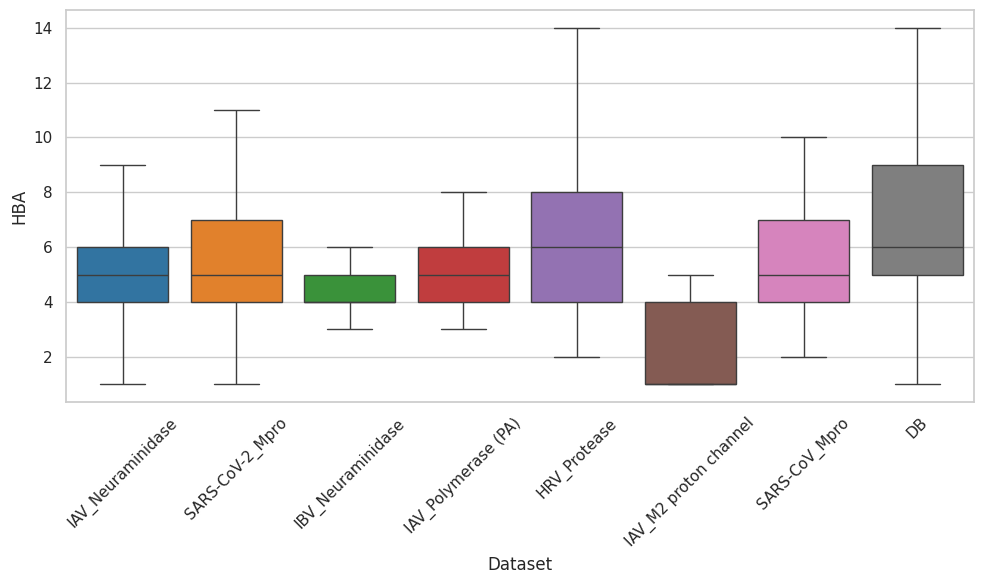

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


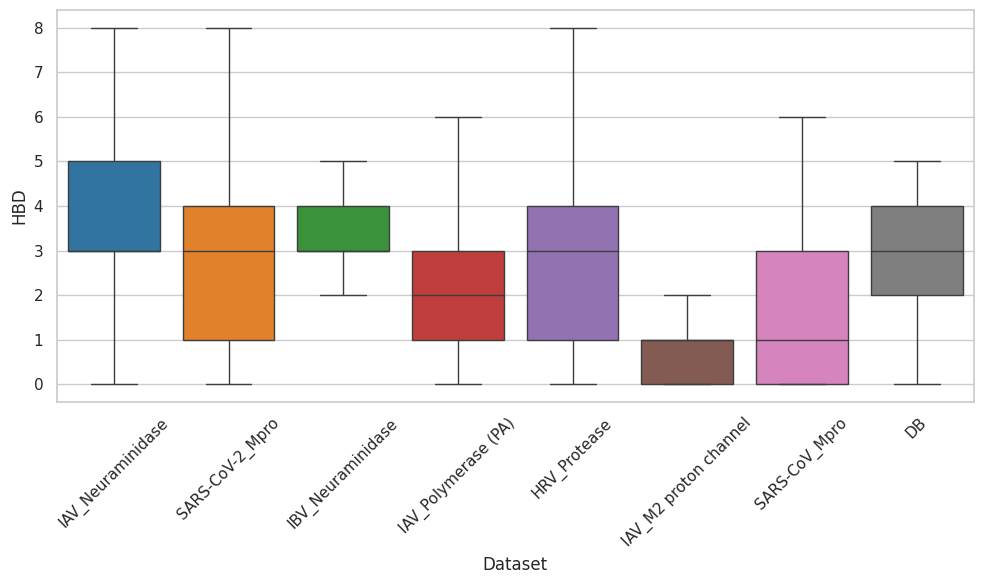

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


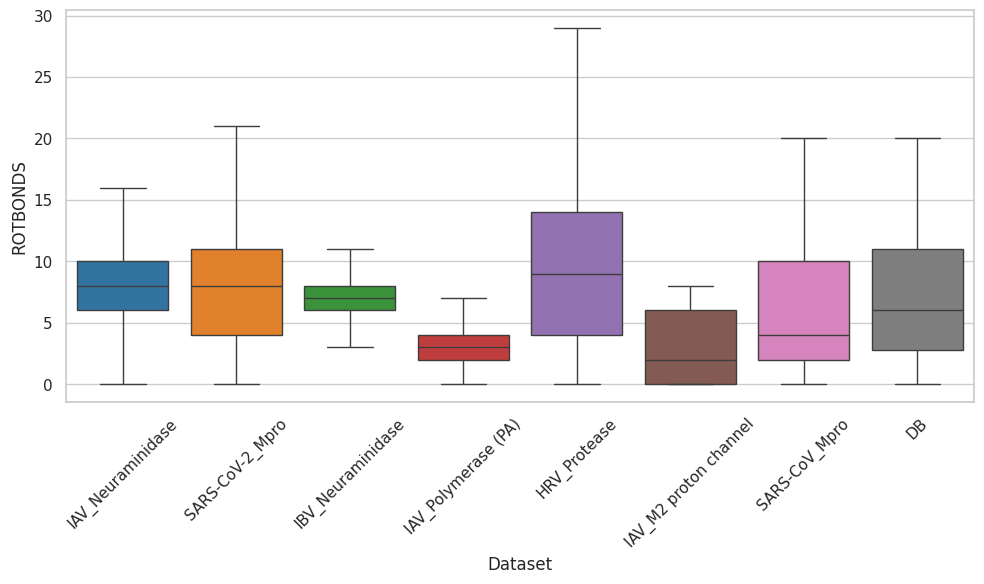

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


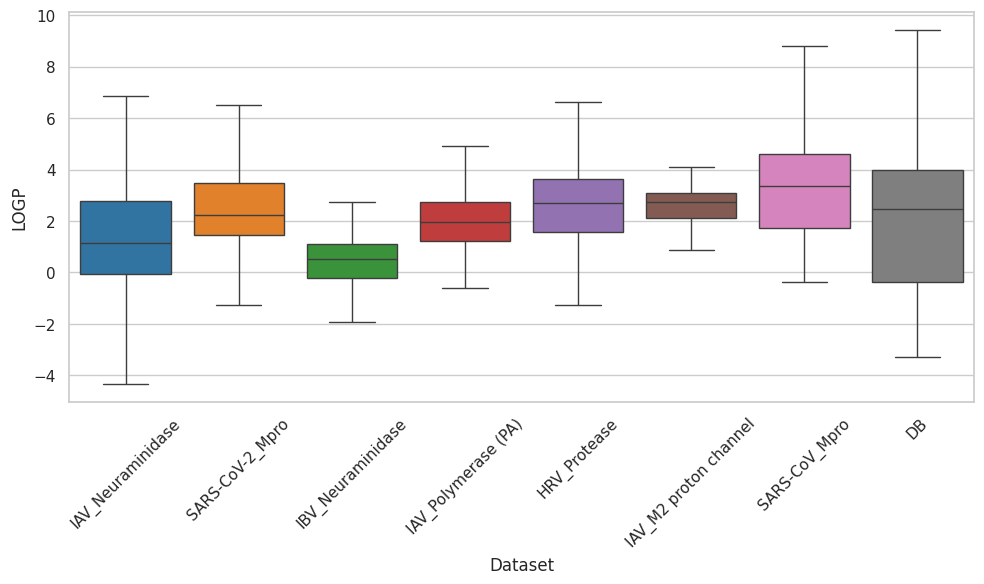

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


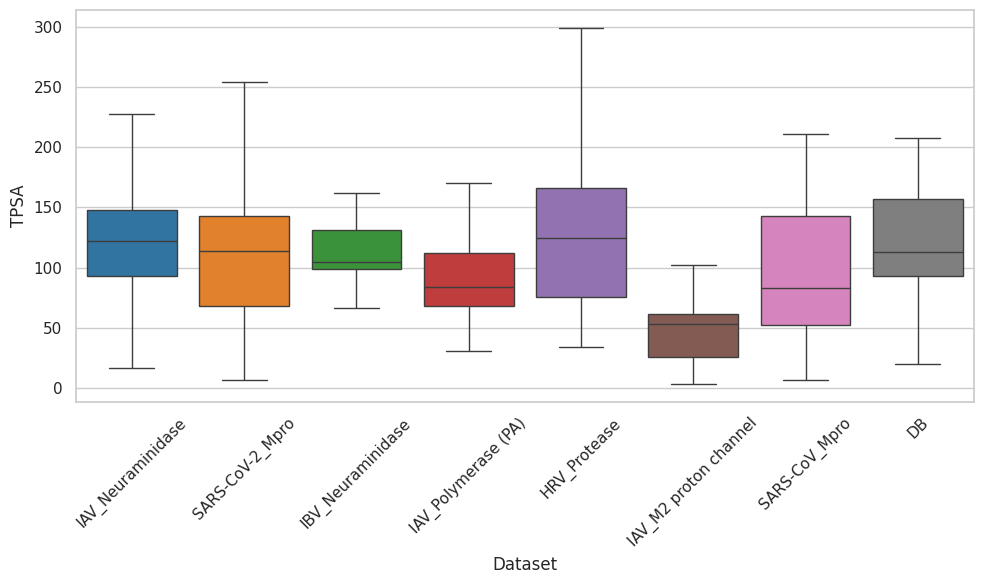

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


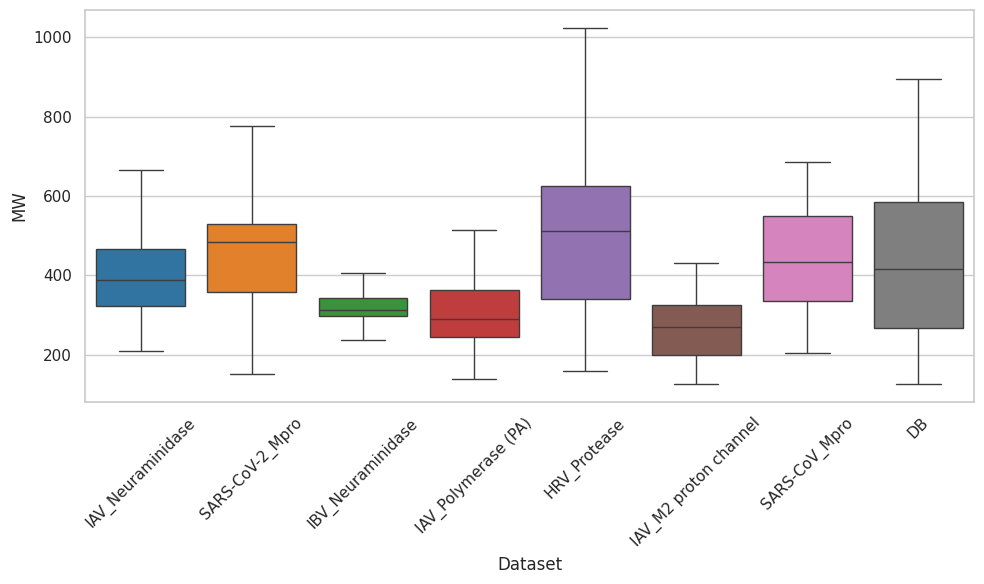

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


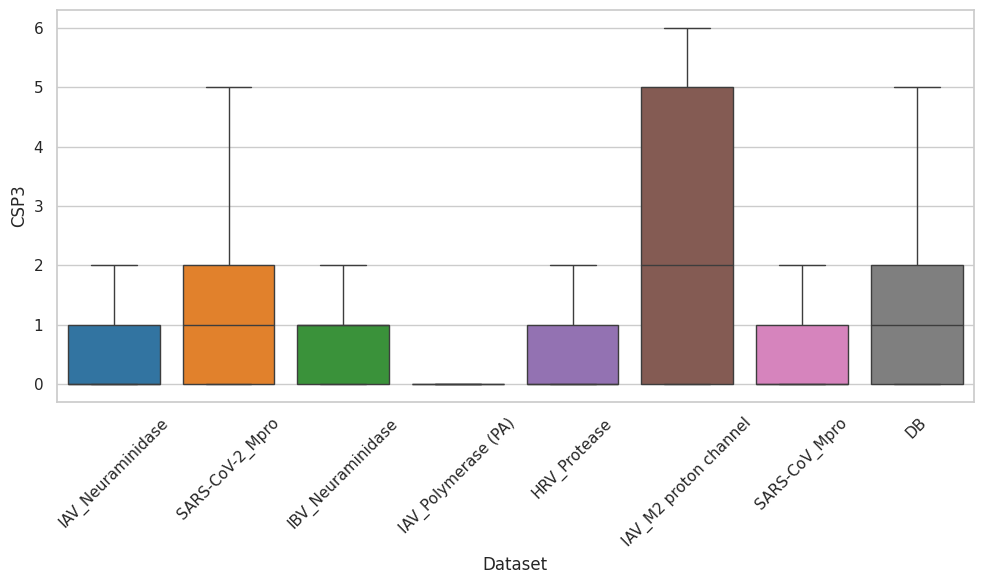

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


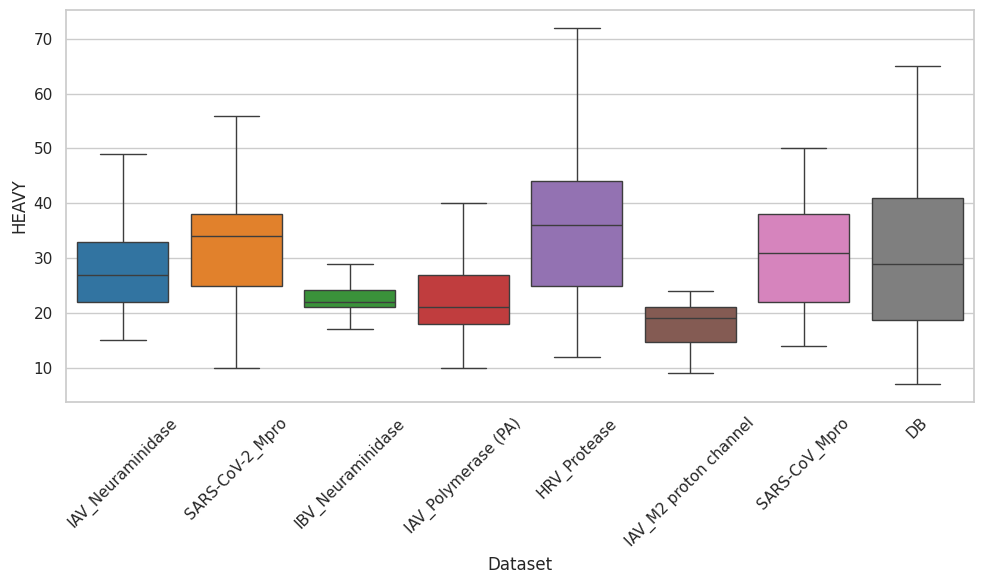

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


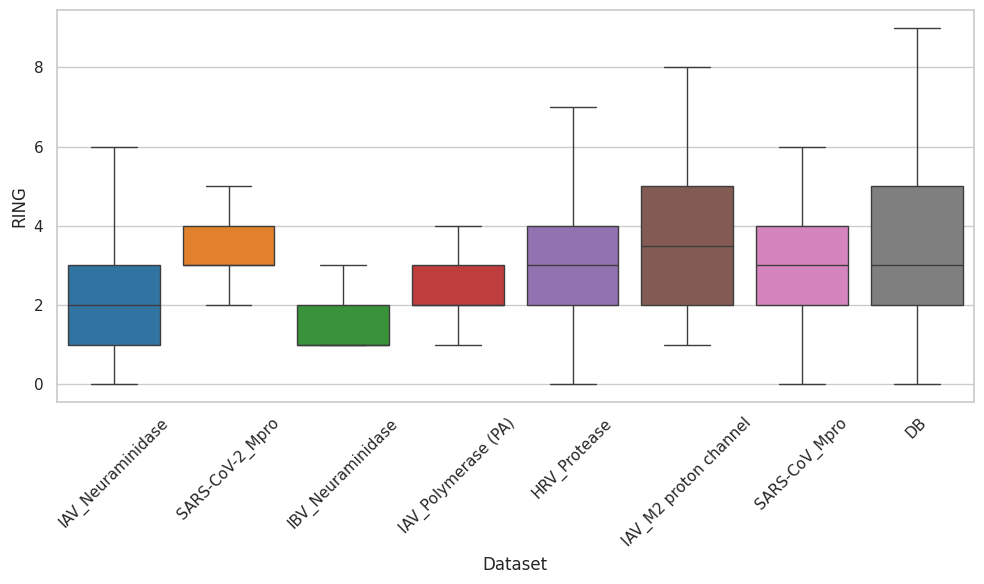

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


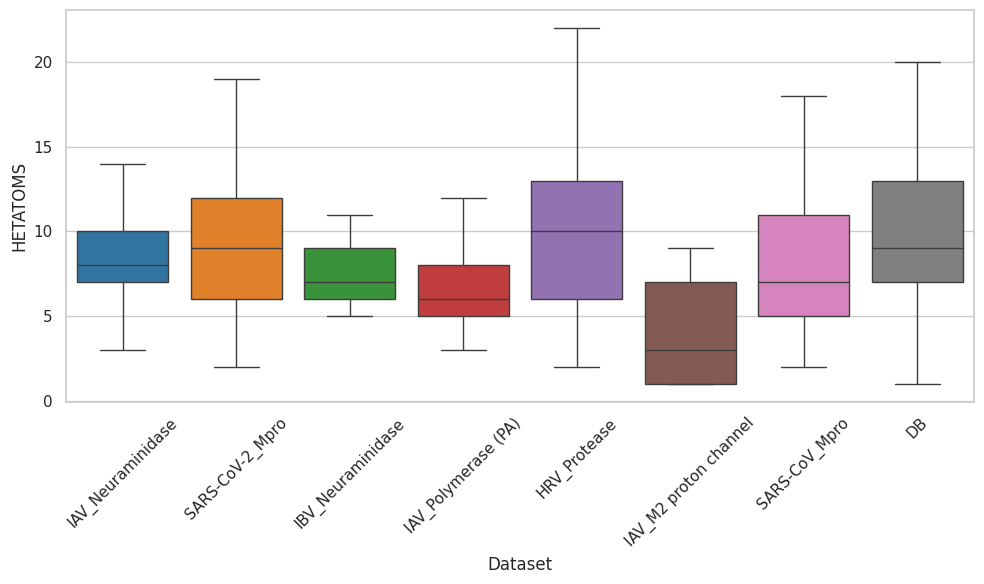

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


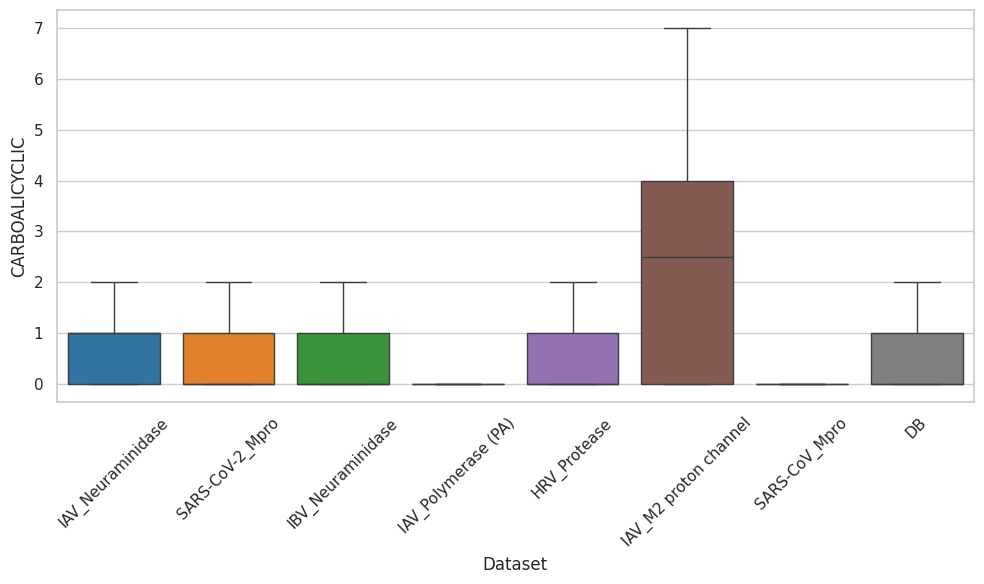

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


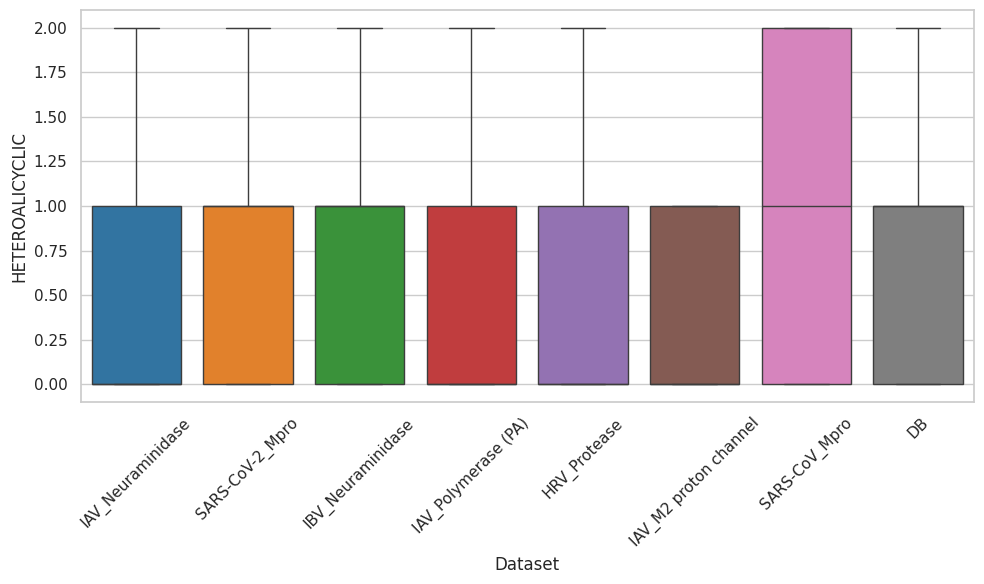

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


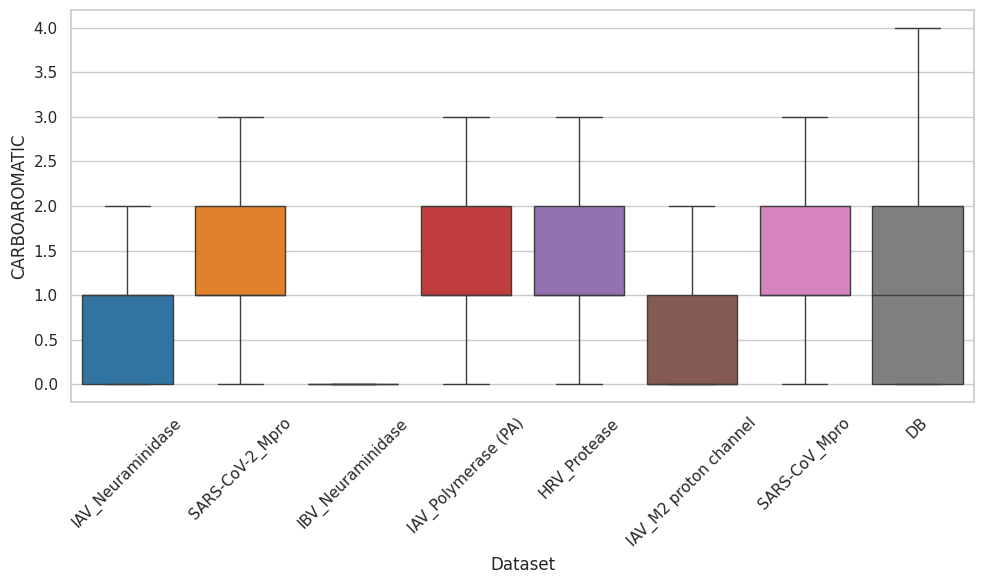

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


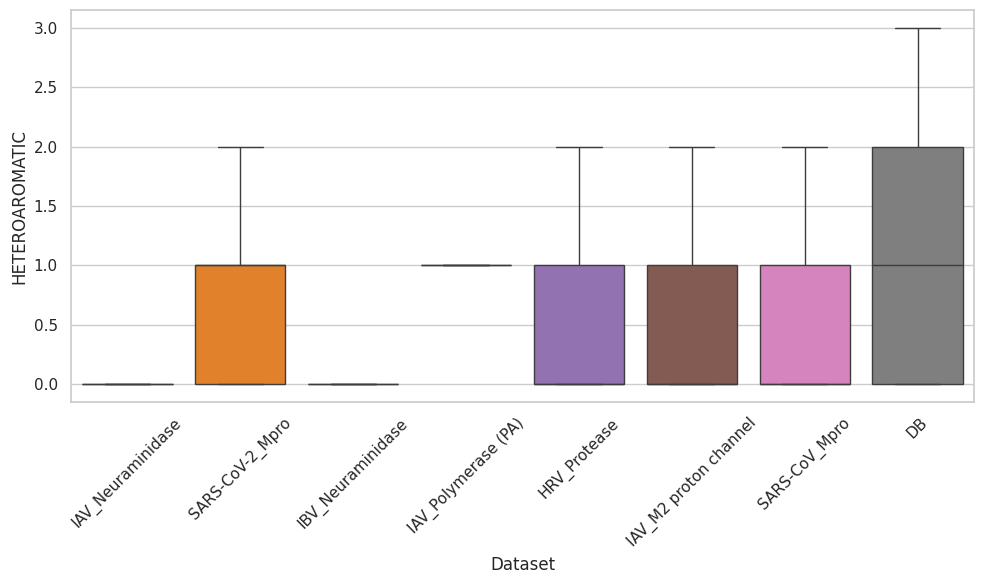

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


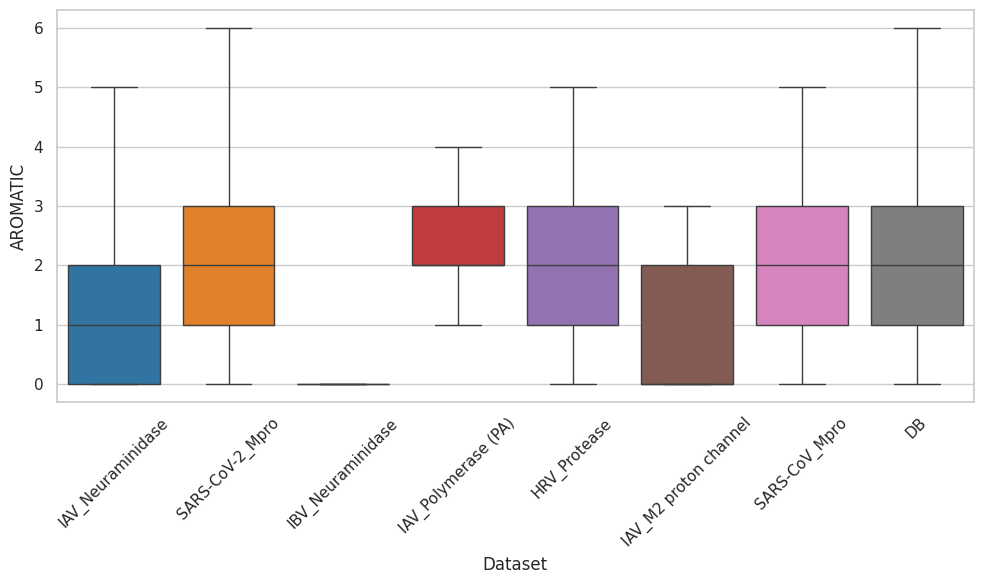

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


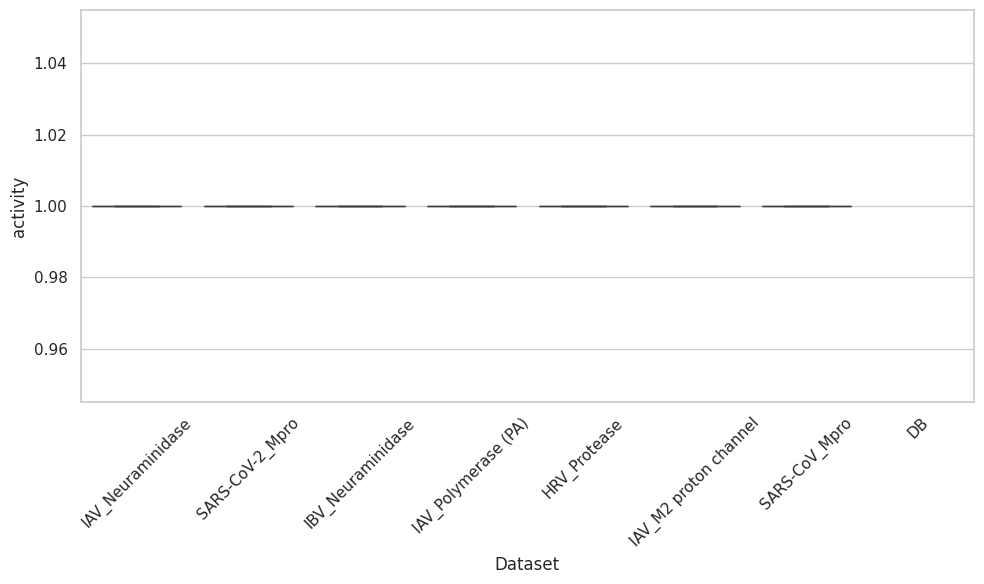

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


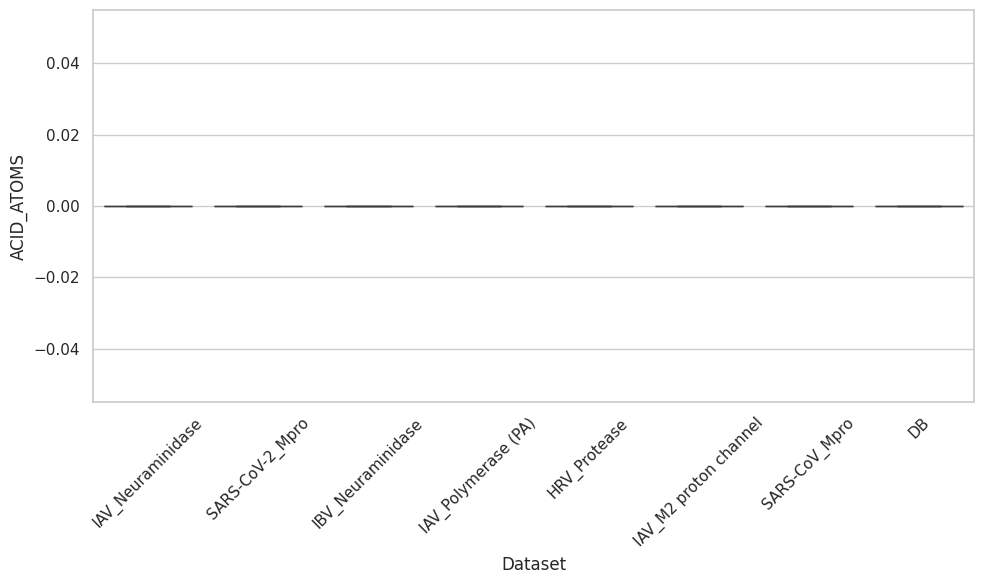

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


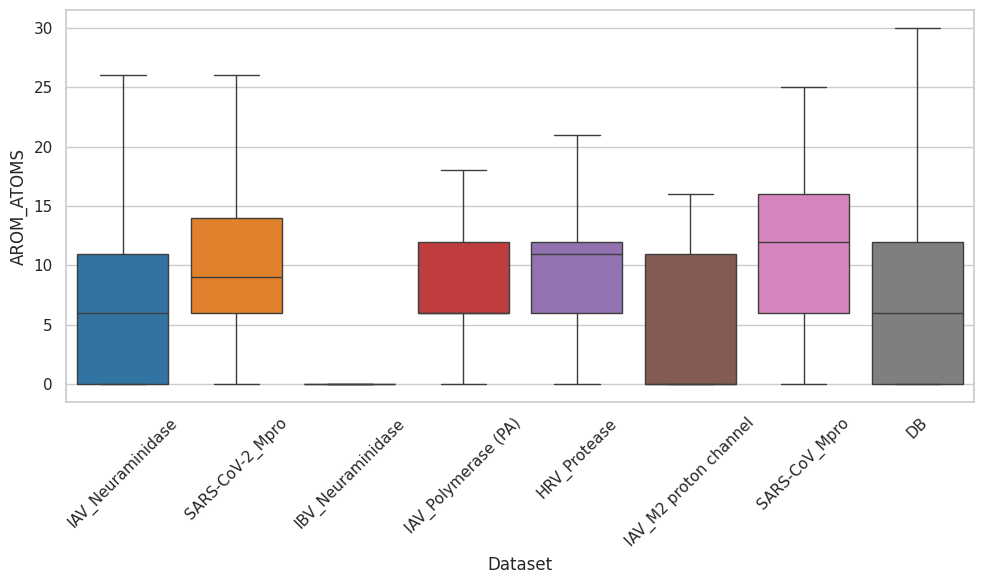

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


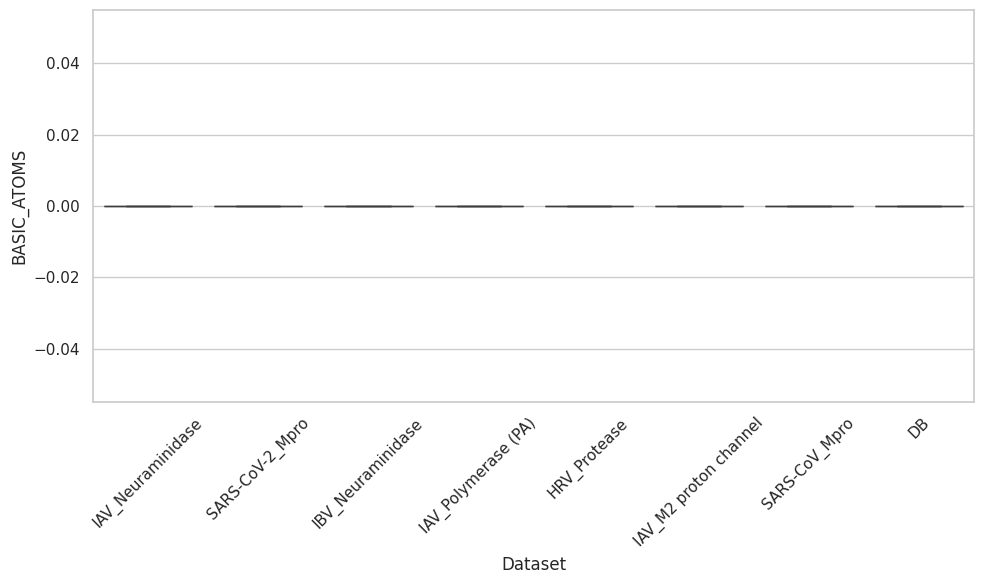

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


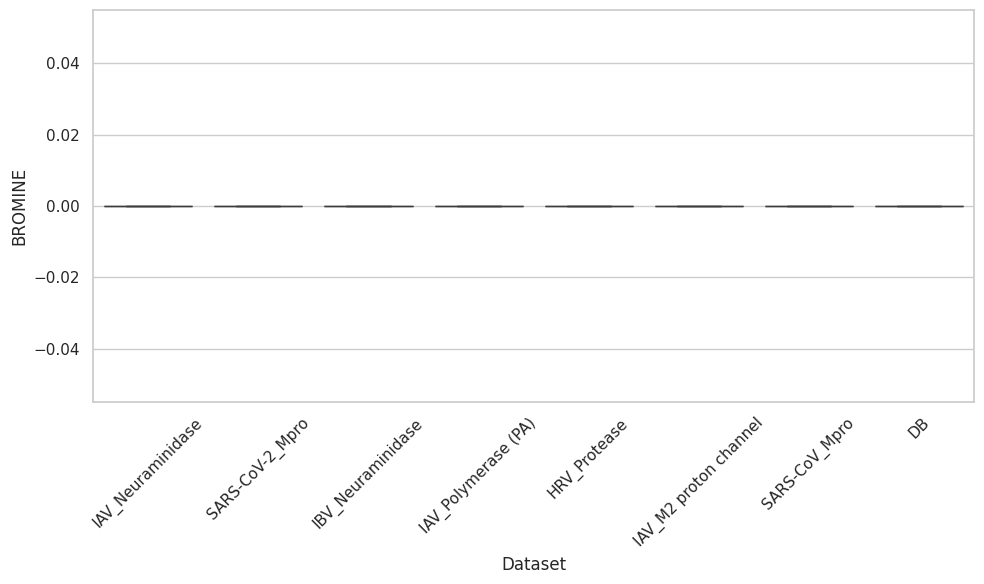

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


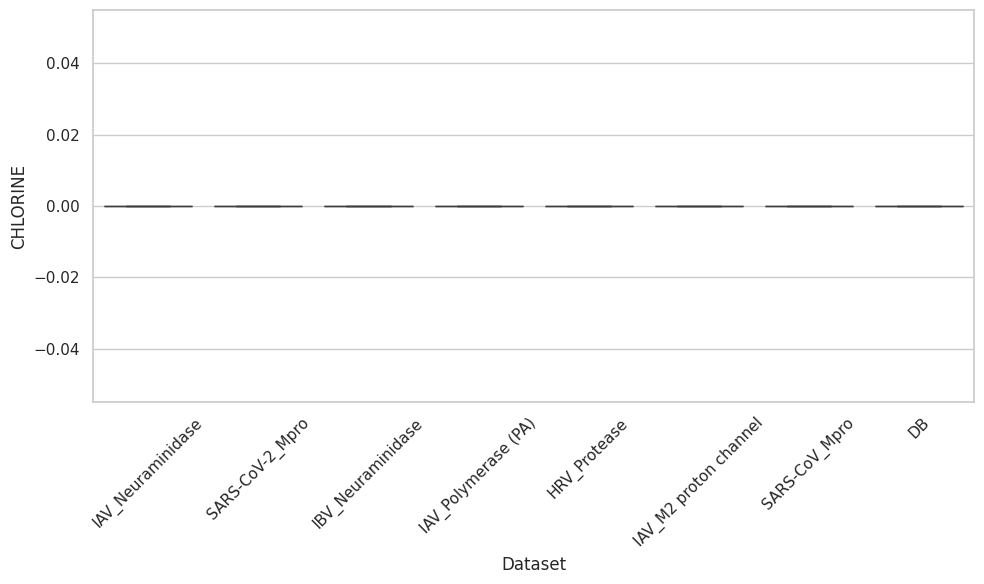

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


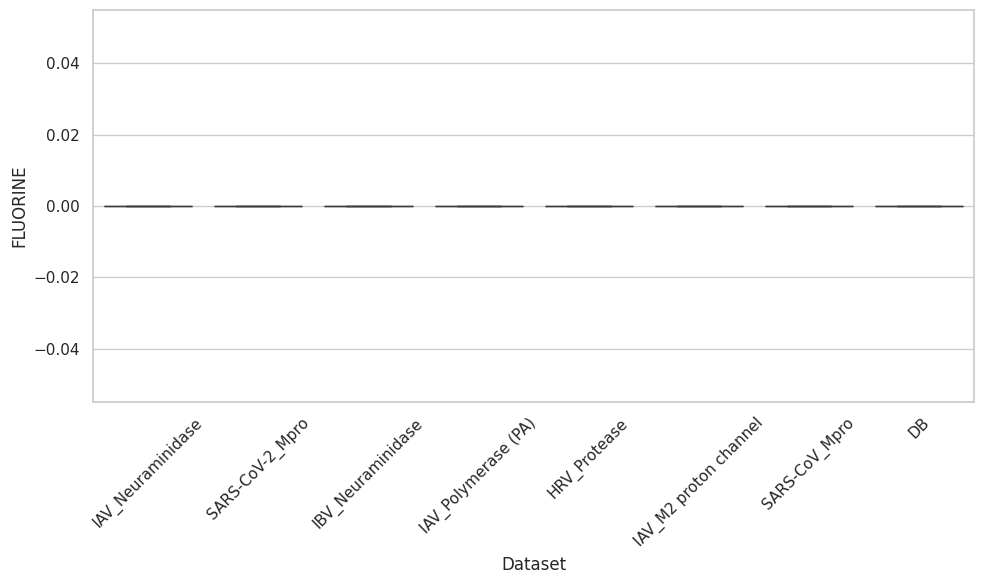

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


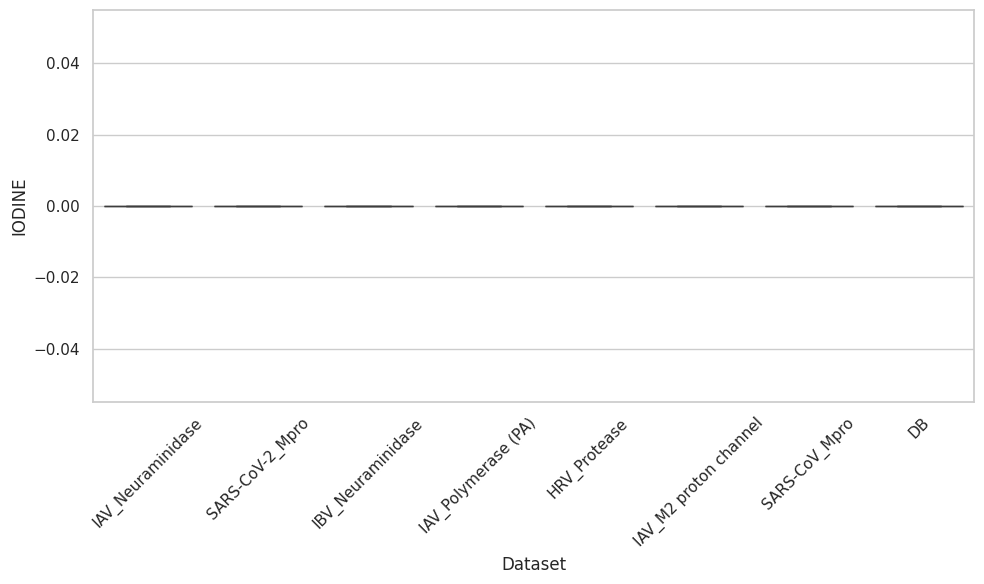

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


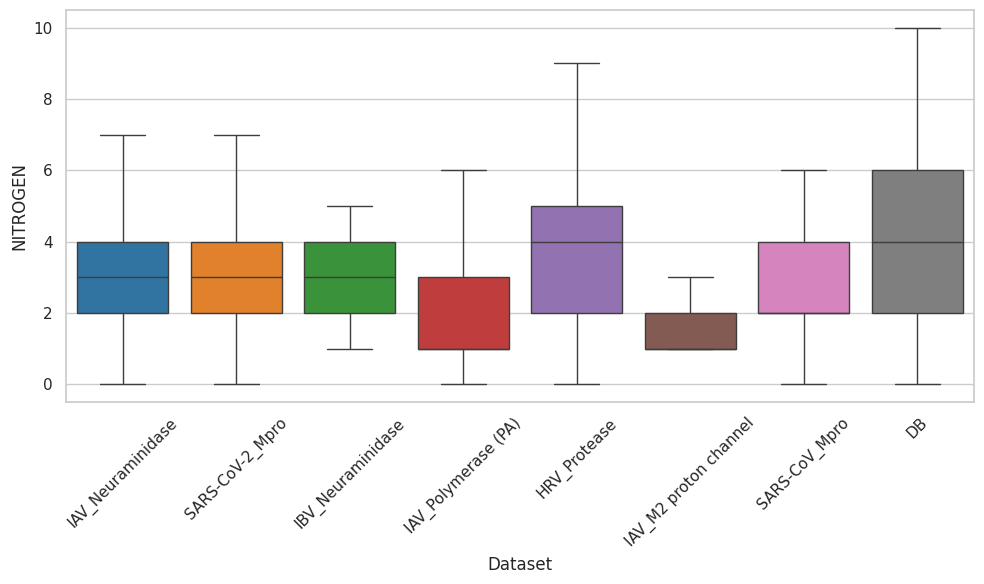

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


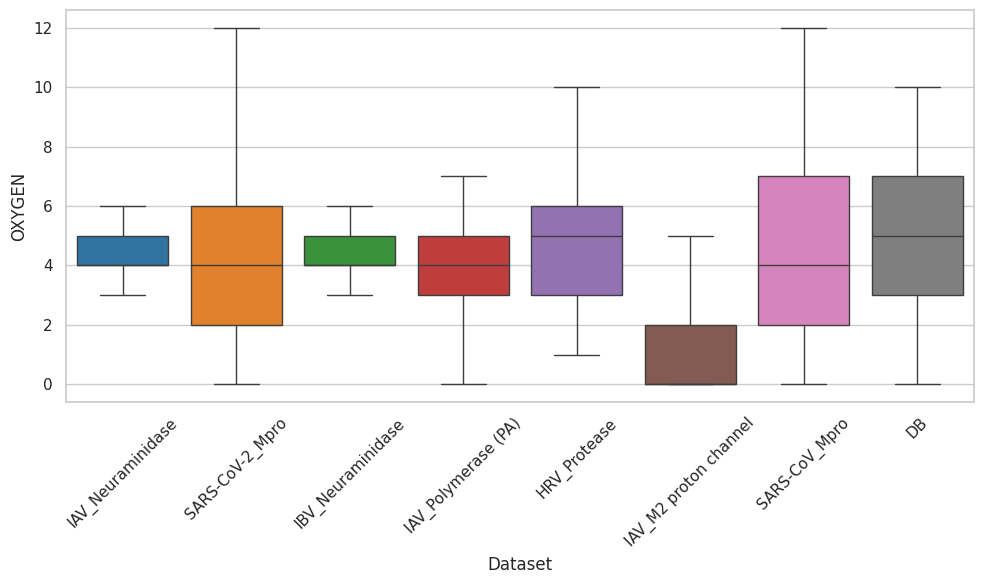

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


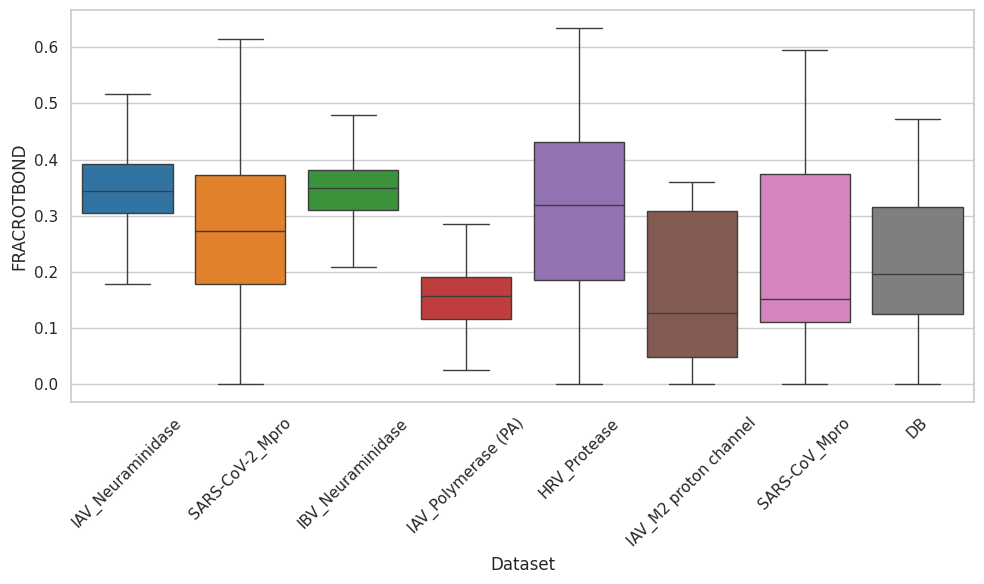

<ipython-input-37-f42bb14c191f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)


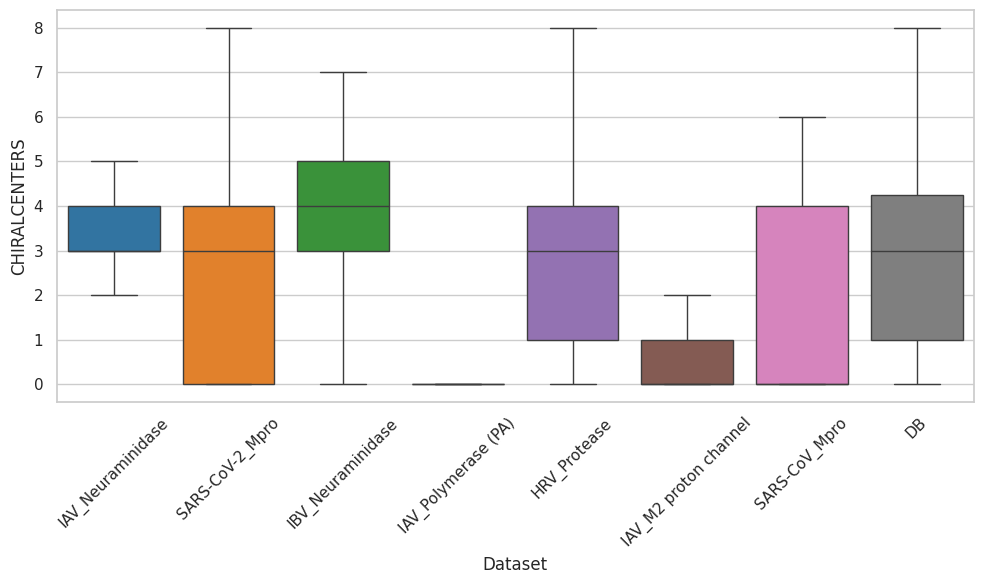

In [ ]:
# Exclude non-properties columns
excluded_columns = ['ID', 'main_organism', 'acronym', 'target', 'SMILES', 'DATASET']

# Filter numeric columns excluding above ones
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).columns
columns_to_plot = [col for col in numeric_columns if col not in excluded_columns]

# Define personalized colors for each 'DATASET'
dataset_categories = combined_df['DATASET'].unique()
custom_palette = dict(zip(dataset_categories, ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])) # Añadir un color para la categoría 'FDA'

# Generate a boxplot for each numeric property
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))

    # Create personalized boxplot
    sns.boxplot(x='DATASET', y=col, data=combined_df, palette=custom_palette, showfliers=False)

    # Personalize box plot
    #plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel(col, fontsize=12)

    # Adjust values
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save each boxplot
    plt.savefig(f'boxplot_{col}.png', format='png', dpi=600)


    plt.show()